In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [15]:
base_df = pd.read_csv("./dataset/cards.csv")

C:\Users\Damien\AppData\Local\Temp\ipykernel_6808\1801149508.py:1: DtypeWarning: Columns (3,11,18,22,26,29,53,59,60,67,68,77,78,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv("./dataset/cards.csv")


### Brief overview

In [16]:
print(base_df.columns)
print(f"Shape: {base_df.shape}")
print(f"Size: {base_df.size}")

Index(['index', 'id', 'artist', 'asciiName', 'attractionLights',
       'availability', 'boosterTypes', 'borderColor', 'cardKingdomEtchedId',
       'cardKingdomFoilId', 'cardKingdomId', 'cardParts', 'cardsphereId',
       'colorIdentity', 'colorIndicator', 'colors', 'convertedManaCost',
       'defense', 'duelDeck', 'edhrecRank', 'edhrecSaltiness',
       'faceConvertedManaCost', 'faceFlavorName', 'faceManaValue', 'faceName',
       'finishes', 'flavorName', 'flavorText', 'frameEffects', 'frameVersion',
       'hand', 'hasAlternativeDeckLimit', 'hasContentWarning', 'hasFoil',
       'hasNonFoil', 'isAlternative', 'isFullArt', 'isFunny', 'isOnlineOnly',
       'isOversized', 'isPromo', 'isRebalanced', 'isReprint', 'isReserved',
       'isStarter', 'isStorySpotlight', 'isTextless', 'isTimeshifted',
       'keywords', 'language', 'layout', 'leadershipSkills', 'life', 'loyalty',
       'manaCost', 'manaValue', 'mcmId', 'mcmMetaId', 'mtgArenaId',
       'mtgjsonFoilVersionId', 'mtgjsonNonF

## Who are the most productive artists ?


Text(0, 0.5, '')

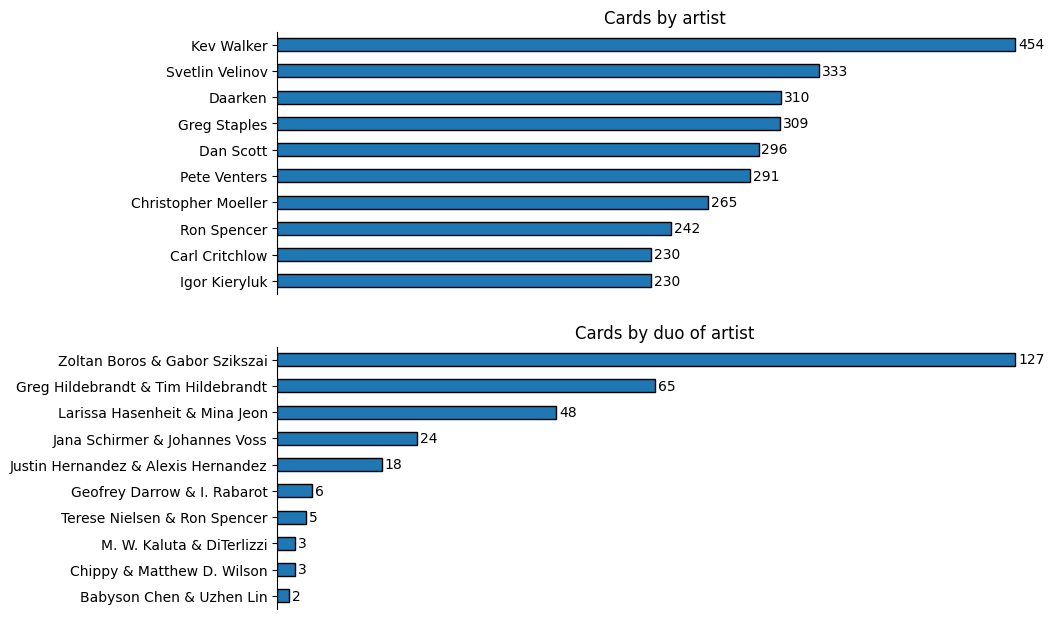

In [17]:
df = base_df[["artist", "name"]].dropna().drop_duplicates()


# separate solo and duo, by applying a mask
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df_solo = df[~df["mask"]].value_counts("artist", ascending=True)[-10:]
df_duo = df[df["mask"]].value_counts("artist", ascending=True)[-10:]


fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(10, 7.5)
# remove the plot borders
for axe in axes:
    for side in ["top", "bottom", "right"]:
        axe.spines[f"{side}"].set_visible(False)


solo_plot = df_solo.plot(kind="barh", ax=axes[0], rot=0, edgecolor="k")
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.bar_label(solo_plot.containers[0], padding=2)
solo_plot.set_title("Cards by artist")
solo_plot.set_ylabel("")


duo_plot = df_duo.plot(kind="barh", ax=axes[1], rot=0, edgecolor="k")
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.bar_label(duo_plot.containers[0], padding=2)
duo_plot.set_title("Cards by duo of artist")
duo_plot.set_ylabel("")

## What are the 10 most reprinted cards ?


Text(0, 0.5, '')

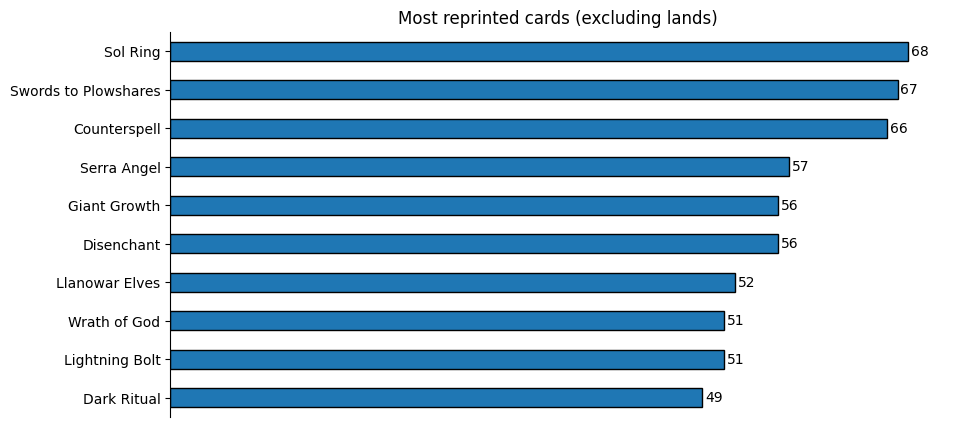

In [18]:
df = base_df[["name", "types"]]


df = df.loc[(df["types"] != "Land")]  # exclude all land
df = df["name"].value_counts(ascending=True)[-10:]  # select the top ten


fig, axes = plt.subplots()
fig.set_size_inches(10, 5)
# remove the plot borders
for side in ["top", "right", "bottom"]:
    axes.spines[f"{side}"].set_visible(False)


plot = df.plot(kind="barh", rot=0, edgecolor="k", ax=axes)
plot.tick_params("x", which="both", bottom=False, labelbottom=False)
plot.set_title("Most reprinted cards (excluding lands)")
plot.bar_label(plot.containers[0], padding=2)
plot.set_xlabel("")
plot.set_ylabel("")

## What is the proportion of original cards ?


Text(0, 0.5, '')

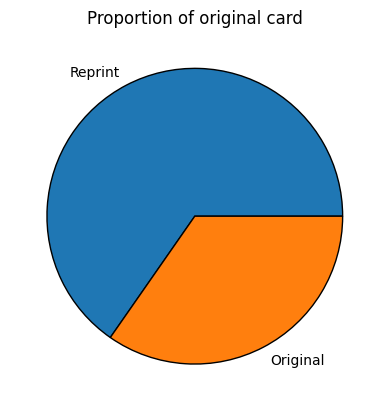

In [19]:
df = base_df[["name", "isReprint"]].drop_duplicates().dropna()


df = df.value_counts("isReprint").rename({0: "Reprint", 1: "Original"})


plot = df.plot(kind="pie", wedgeprops={"edgecolor": "k"})
plot.set_title("Proportion of original card")
plot.set_ylabel("")

## What is the most represented type ?


Text(0.5, 0, '')

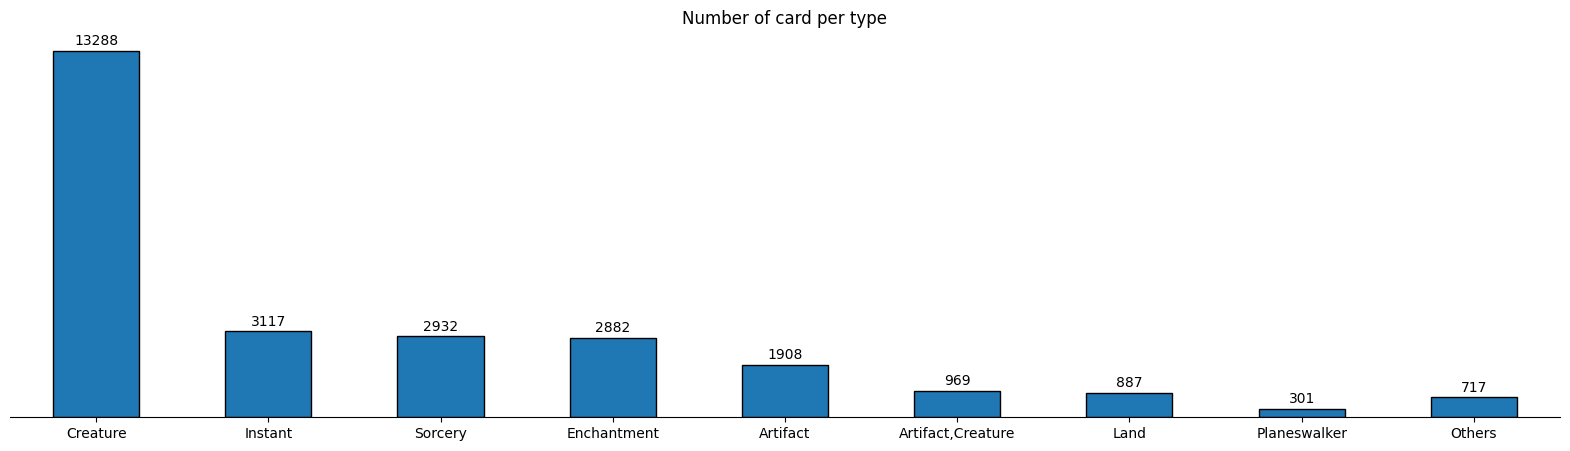

In [20]:
df = base_df[["name", "types"]].dropna().drop_duplicates()
df = df["types"].value_counts(ascending=True)


# regroup the lesser values into "Others"
pivot_value = 8
to_plot = df[-pivot_value:].sort_values(ascending=False)
to_plot.loc[to_plot.size + 1] = df[:-pivot_value].sum()
to_plot = to_plot.rename({pivot_value + 1: "Others"})


fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
# remove the plot borders
for side in ["top", "right", "left"]:
    axes.spines[f"{side}"].set_visible(False)


plot = to_plot.plot(kind="bar", rot=0, edgecolor="k", ax=axes)
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.bar_label(plot.containers[0], padding=2)
plot.set_title("Number of card per type")
plot.set_xlabel("")